This dataset has **768 entries** with **9 columns**: `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, `Age`, and `Outcome`. Each entry represents a patient’s health profile, including information on pregnancies, glucose levels, blood pressure, and other metrics relevant to diabetes prediction. No columns have missing values, and data types include both `int64` and `float64`. This dataset is ready for further analysis, especially for exploratory data analysis (EDA) and model training.

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np  
# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# EDA

## 1. Load and Check Data Overview

In [2]:
data = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes_dataset.csv')

data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. Check Missing Data and Outliers

In [4]:
# Check the number of 0 values in the main columns
missing_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in missing_columns:
    missing_count = (data[col] == 0).sum()
    print(f"Number of 0 values in the column {col}: {missing_count}")


Number of 0 values in the column Glucose: 5
Number of 0 values in the column BloodPressure: 35
Number of 0 values in the column SkinThickness: 227
Number of 0 values in the column Insulin: 374
Number of 0 values in the column BMI: 11


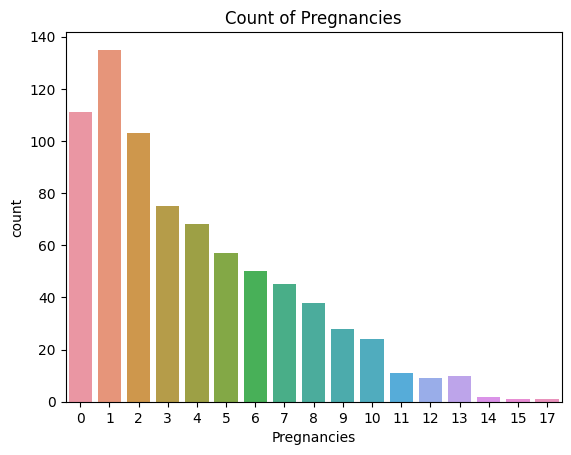

In [5]:
sns.countplot(x='Pregnancies', data=data)
plt.title("Count of Pregnancies")
plt.show()

## 3. Data Distribution


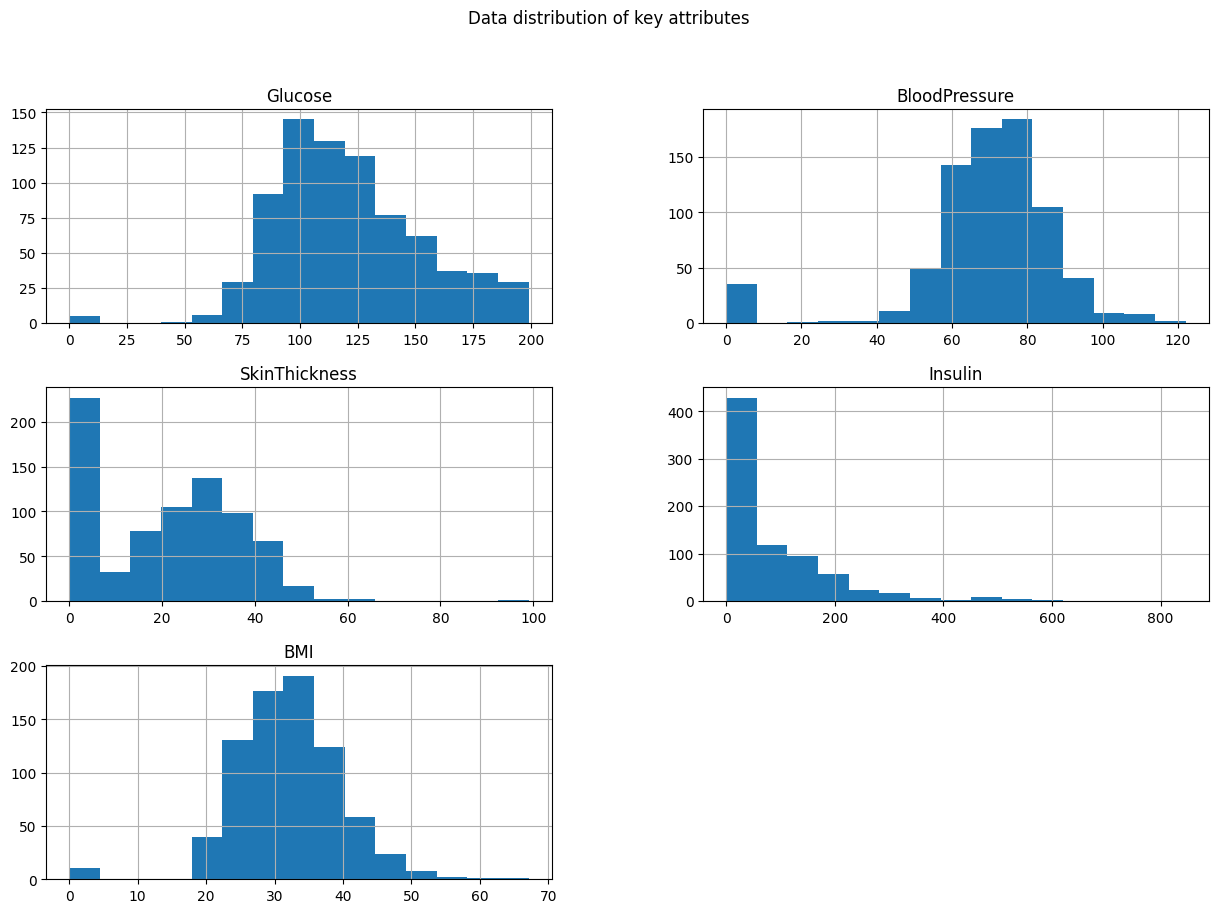

In [6]:
data[missing_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle("Data distribution of key attributes")
plt.show()


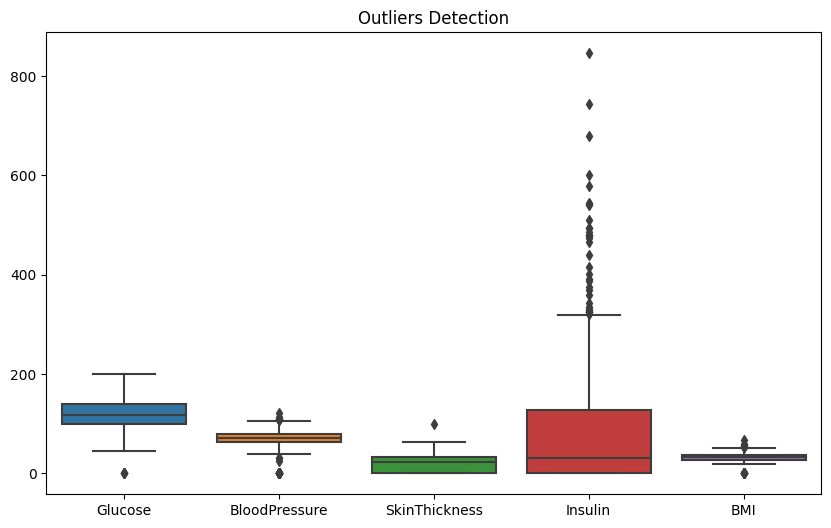

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[missing_columns])
plt.title("Outliers Detection")
plt.show()


## 4. Correlation Matrix

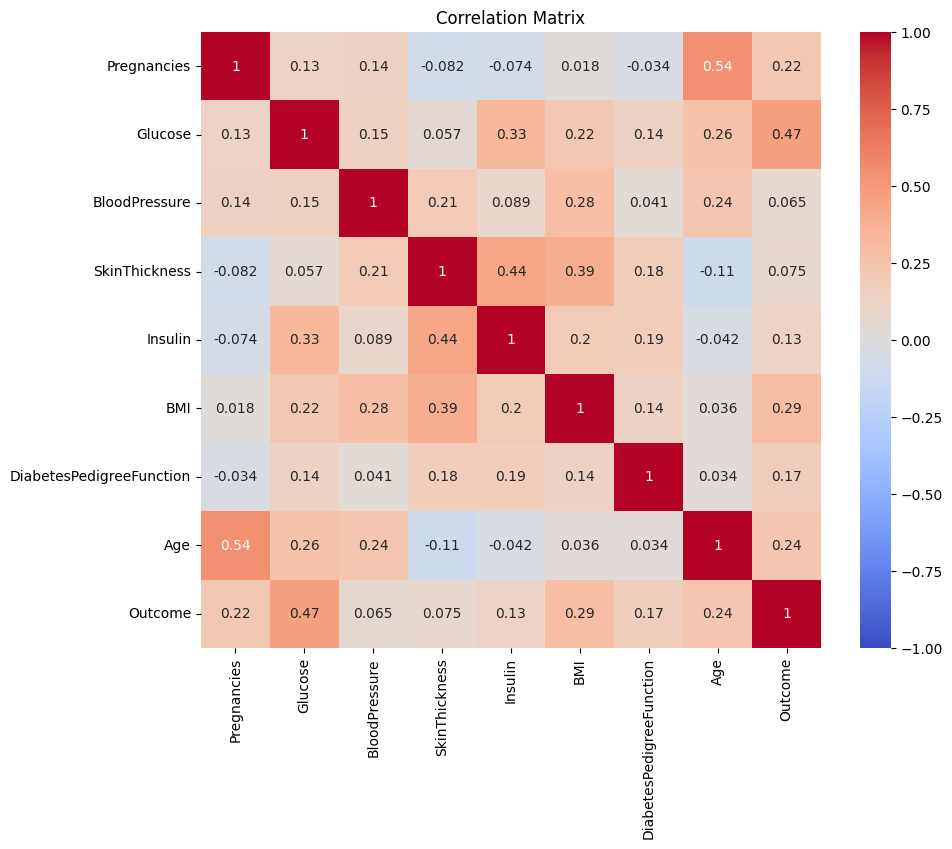

In [8]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


## 5. Distribution of Groups by Outcome

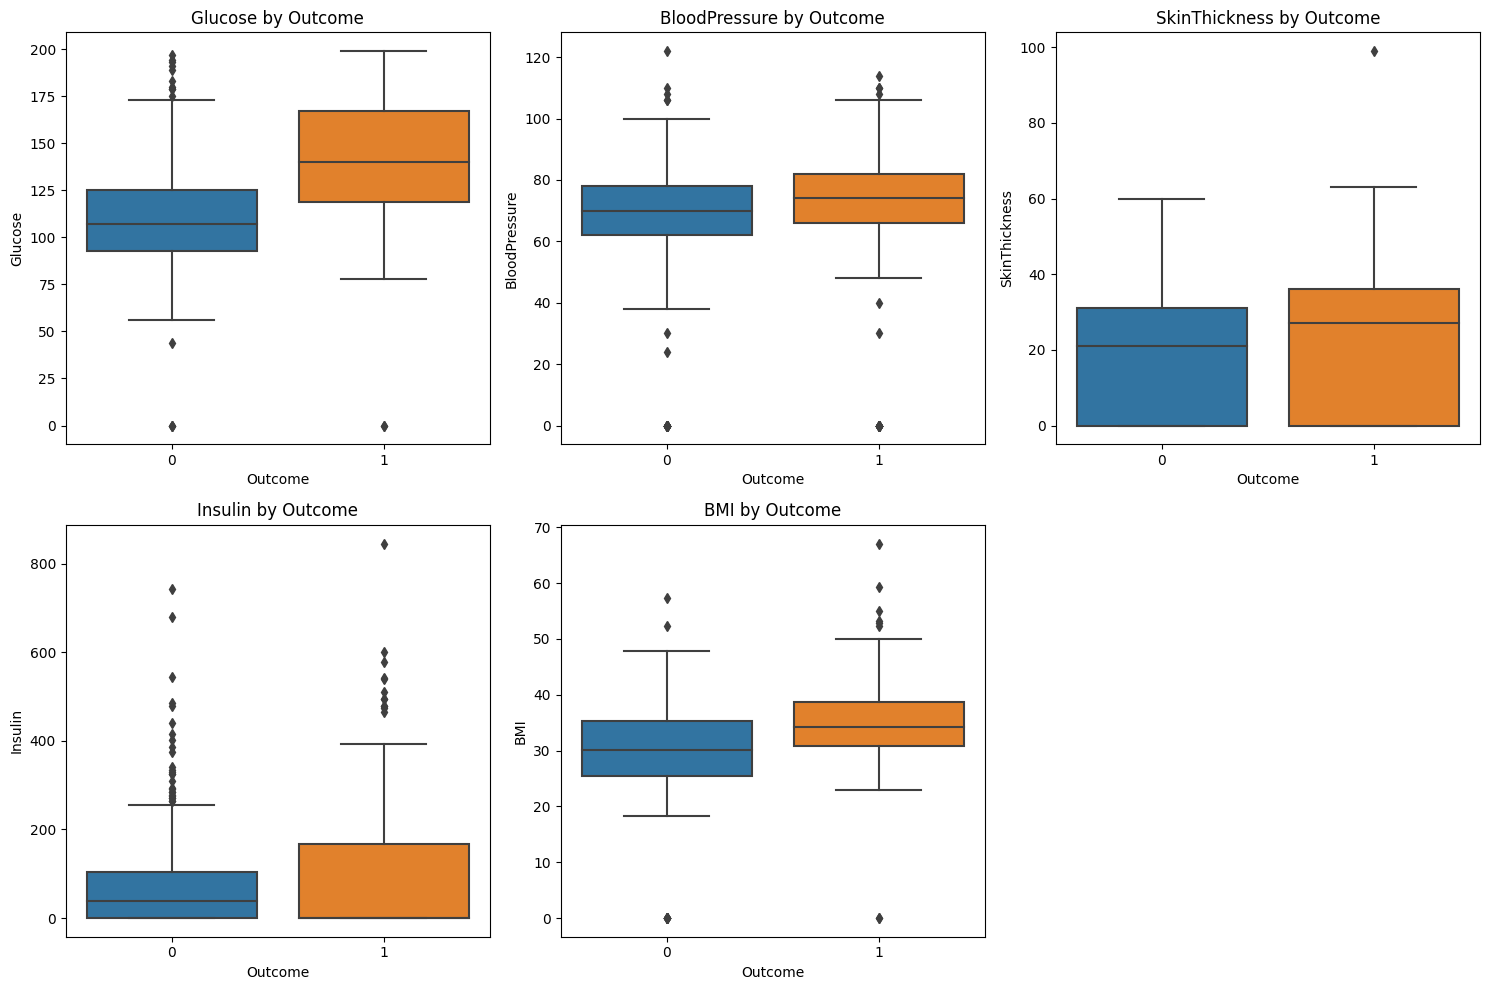

In [9]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(missing_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, x='Outcome', y=col)
    plt.title(f"{col} by Outcome")
plt.tight_layout()
plt.show()


## 6. Handle Outliers and Missing Data

In [10]:
# Replace Zeros with Mean Values
for col in missing_columns:
    data[col] = data[col].replace(0, data[col].mean())

In [11]:
# Handle Outliers (Optional)
data_no_outliers = data[(np.abs(stats.zscore(data[missing_columns])) < 3).all(axis=1)]
print("Samples after outlier removal:", len(data_no_outliers))


Samples after outlier removal: 735


## 7. Check Outcome Proportion

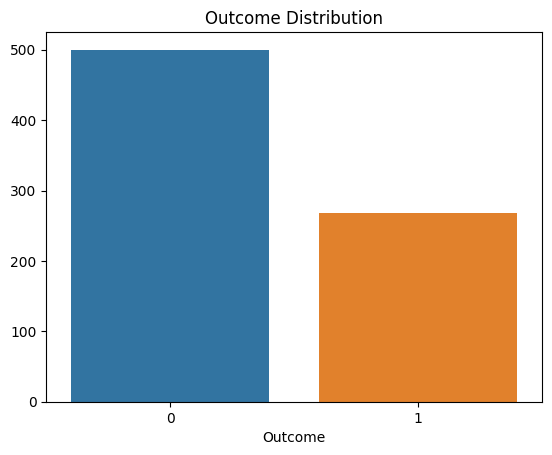

In [12]:
outcome_counts = data['Outcome'].value_counts()
sns.barplot(x=outcome_counts.index, y=outcome_counts.values)
plt.title("Outcome Distribution")
plt.show()

Compare the distributions of continuous variables based on the outcome:

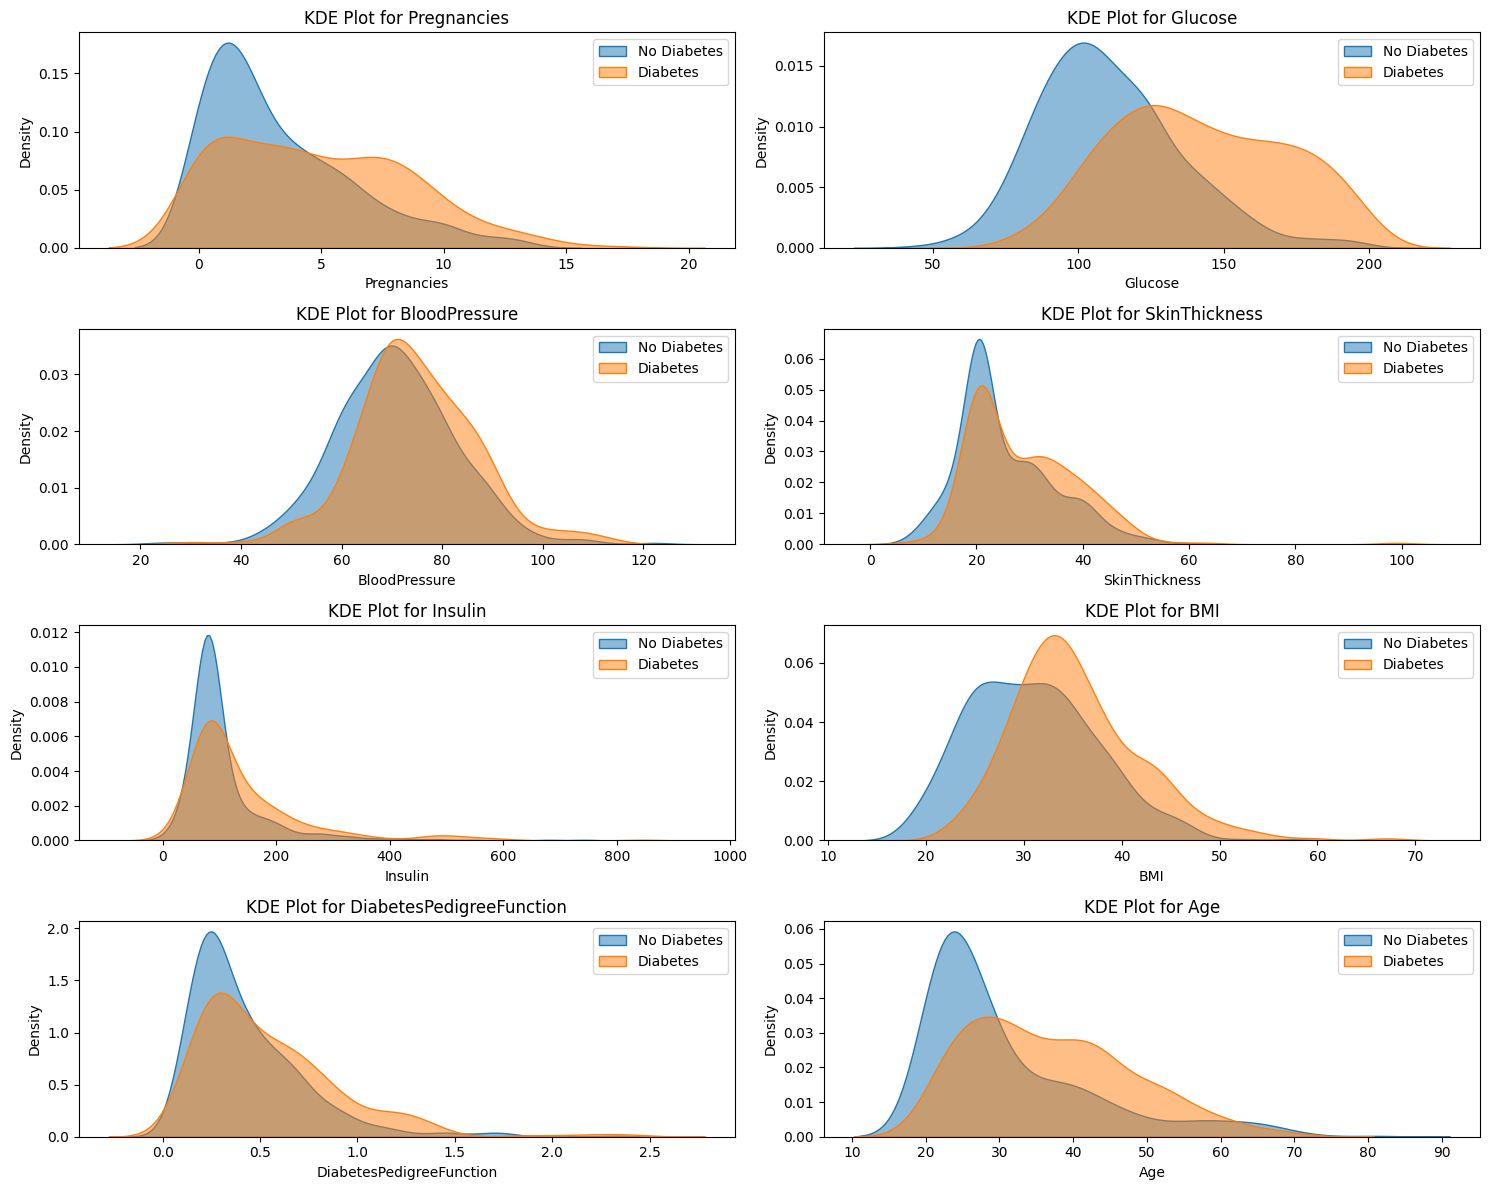

In [13]:
# List of main columns
main_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(15, 12))

# Loop through each column and create a KDE plot
for i, col in enumerate(main_columns, 1):
    plt.subplot(4, 2, i)  # Create a 4x2 grid for subplots
    sns.kdeplot(data[data['Outcome'] == 0][col], label='No Diabetes', fill=True, alpha=0.5)
    sns.kdeplot(data[data['Outcome'] == 1][col], label='Diabetes', fill=True, alpha=0.5)
    plt.title(f"KDE Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()


# Modeling

In [14]:
from sklearn.model_selection import train_test_split

# Features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [16]:
y_pred = model.predict(X_test)


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)


Accuracy: 0.7662337662337663
Confusion Matrix:
 [[83 16]
 [20 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



- **Accuracy**: 76.62%
- **Confusion Matrix**: 
  - True Negatives (TN): 83
  - False Positives (FP): 16
  - False Negatives (FN): 20
  - True Positives (TP): 35
- **Classification Report**:
  - **Precision for No Diabetes**: 81%
  - **Precision for Diabetes**: 69%
  - **Recall for No Diabetes**: 84%
  - **Recall for Diabetes**: 64%
  - **F1-score for No Diabetes**: 82%
  - **F1-score for Diabetes**: 66%

### Interpretation:
- The model is better at predicting patients without diabetes (higher precision and recall).
- There's room for improvement in predicting patients with diabetes (lower precision and recall).


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

grid = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'C': 10, 'solver': 'liblinear'}


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [19]:
# Initialize the model with best parameters
final_model = LogisticRegression(C=10, solver='liblinear', max_iter=200)

# Train the model
final_model.fit(X_train, y_train)

# Evaluate the model again
y_final_pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_final_pred)
print(f"Final Model Accuracy: {final_accuracy}")


Final Model Accuracy: 0.7662337662337663


In [20]:
# Sample data for prediction
sample_data = [
    {'Pregnancies': 2, 'Glucose': 85, 'BloodPressure': 66, 'SkinThickness': 29, 'Insulin': 0, 'BMI': 26.6, 'DiabetesPedigreeFunction': 0.351, 'Age': 31},
    {'Pregnancies': 5, 'Glucose': 130, 'BloodPressure': 70, 'SkinThickness': 35, 'Insulin': 130, 'BMI': 32.0, 'DiabetesPedigreeFunction': 0.672, 'Age': 42},
    {'Pregnancies': 1, 'Glucose': 89, 'BloodPressure': 62, 'SkinThickness': 20, 'Insulin': 80, 'BMI': 24.9, 'DiabetesPedigreeFunction': 0.167, 'Age': 28},
    {'Pregnancies': 3, 'Glucose': 105, 'BloodPressure': 75, 'SkinThickness': 23, 'Insulin': 95, 'BMI': 28.7, 'DiabetesPedigreeFunction': 0.199, 'Age': 34},
    {'Pregnancies': 4, 'Glucose': 145, 'BloodPressure': 80, 'SkinThickness': 38, 'Insulin': 150, 'BMI': 34.5, 'DiabetesPedigreeFunction': 0.543, 'Age': 50}
]

sample_df = pd.DataFrame(sample_data)

predictions = final_model.predict(sample_df)
print("Predicted Outcomes:", predictions)


Predicted Outcomes: [0 0 0 0 1]
